### Loading Data and Libraries

In [62]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

#Importing Libraries and Loading Our Data
import json #  json package iteratively parse the json file instead of reading it all in at once
import sys,os
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize #package for flattening json in pandas df
import numpy as np
import scipy
import math
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# set data path using a relative path
filename = "../NumPy/datasets/data_science_extract.csv"

# Load data 
pd_to_csv = pd.read_csv(filename, index_col=0)
#pd_t = pd_to_csv.iloc[:, 0:]

# Print the first three rows
df = pd.DataFrame(pd_to_csv)
#df.head(3)



(2000, 8)
['careerjunction_za_courses', 'careerjunction_za_employer_names', 'careerjunction_za_future_jobtitles', 'careerjunction_za_historical_jobtitles', 'careerjunction_za_primary_jobtitle', 'careerjunction_za_recent_jobtitles', 'careerjunction_za_skills', 'id']


## Data Wrangling

The data that was originally obtained was in the form of a JSON File. 
This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly.
We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.


#### The dataset

The data contains information about career post and information about how to match candidate to a particular job post and then make further suggestion 
about likehood of the post. There are quite a few questions we could answer using the dataset, including:

    [1.] What is the total number of the profile ID's' job present?
    [2.] What are the most common skills, education, and courses people serach for?
    [3.] What are the most common primary job title and recent job titles?
    [4.] employer names, future job titles etc.
    
Since we don't know the structure of the JSON file upfront (as assumption), so we do some exploration to figure it out. This task used Jupyter Notebook for the exploration.

We start by understanding the dataset

In [155]:
# check if dataframe is pandas list or series
type(df.careerjunction_za_recent_jobtitles)

pandas.core.series.Series

In [65]:
#Understanding the Dataset
# examine the shape
df.shape

(2000, 8)

In [66]:
# list of profile columns
list(df.columns)

['careerjunction_za_courses',
 'careerjunction_za_employer_names',
 'careerjunction_za_future_jobtitles',
 'careerjunction_za_historical_jobtitles',
 'careerjunction_za_primary_jobtitle',
 'careerjunction_za_recent_jobtitles',
 'careerjunction_za_skills',
 'id']

In [97]:
# examine the series 
df.careerjunction_za_future_jobtitles.value_counts().head(10) # 

[]                          656
[u'Software Developer']      24
[u'Developer']               15
[u'Java Developer']          13
[u'Web Developer']            7
[u'software developer']       6
[u'Senior Developer']         5
[u'Business Analyst']         5
[u'Senior C# Developer']      4
[u'Analyst']                  3
Name: careerjunction_za_future_jobtitles, dtype: int64

There are a total of 2000 records with 8 features.

In [98]:
# examine the series 
df.careerjunction_za_future_jobtitles.describe() # describe the columns

count     2000
unique    1226
top         []
freq       656
Name: careerjunction_za_future_jobtitles, dtype: object

### Exploratory Data Analysis

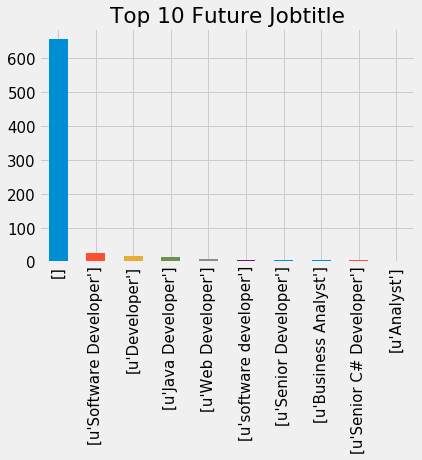

In [138]:
df.careerjunction_za_future_jobtitles.value_counts().head(10).plot.bar(title="Top 10 Future Jobtitle")

In [247]:
orders['careerjunction_za_primary_jobtitle'].describe()

count                   2000
unique                  1197
top       Software Developer
freq                     121
Name: careerjunction_za_primary_jobtitle, dtype: object

In [145]:
#sorting dataframe column
df_sort = df.sort_values("careerjunction_za_primary_jobtitle")
df_sort.head(3)

,careerjunction_za_courses,careerjunction_za_employer_names,careerjunction_za_future_jobtitles,careerjunction_za_historical_jobtitles,careerjunction_za_primary_jobtitle,careerjunction_za_recent_jobtitles,careerjunction_za_skills,id
1592,"[u'Bsc Informatics', u'Computer Hardware Certi...","[u'Absolve', u'Alexander Forbes', u'Bidvest Ba...","[u'Developer', u'Systems Analyst/ Databases', ...",[u'Computer Technician'],.NET Analyst Developer,"[u'Consultant', u'.NET Developer']","[u'Office Suite', u'Visual Studio 08 - 12', u'...",1593
1415,[u'B.TECH'],"[u'Sebata', u'VANESBEN BUSINESS ASSOCIATES', u...","[u'C# Developer', u'.NET Developer']",[],.NET Developer,"[u'.NET Developer', u'.NET Developer']","[u'SQL', u'JAVA SCRIPT', u'CSS', u'HTML', u'WC...",1416
1019,"[u'Information Systems', u'Bsc Information Sys...","[u'Chartered Systems Intergration', u'DVT', u'...","[u'Lead Software Developer', u'Software Develo...",[u'Intern'],.NET Developer,"[u'Senior Software Developer', u'Software Deve...","[u'SAP Business one Developer \u2022', u'Bizta...",1020


In [89]:
df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10]

Software Developer           121
Developer                     68
Web Developer                 49
Senior Developer              28
Java Developer                24
Senior Software Developer     22
Business Analyst              22
Junior Software Developer     20
Application Developer         20
Junior Developer              17
Name: careerjunction_za_primary_jobtitle, dtype: int64

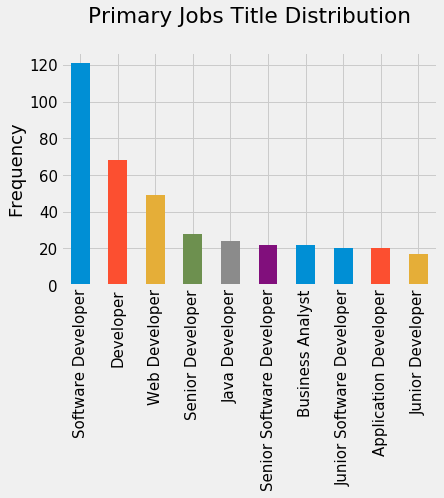

In [78]:
plt.rc("font", size=15)
cnt = df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10].plot(kind='bar') 
plt.title('Primary Jobs Title Distribution\n')
plt.ylabel('Frequency')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

This much easier to read and one can clearly see the software developer and developer are the most popular jobtitle included in the data.
The following show the different varieties of developers job title. However, I limited it to the top ten which you can see here.

In [149]:
# examine the series 
df.careerjunction_za_skills.describe() # describe the columns

count     2000
unique    1987
top         []
freq         9
Name: careerjunction_za_skills, dtype: object

In [150]:
# Check the most skills set, the top 5
df.careerjunction_za_skills.value_counts().head(5) # 

[]                           9
[u'Software Development']    3
[u'Computer Skills']         2
[u'Java']                    2
[u'Programming']             2
Name: careerjunction_za_skills, dtype: int64

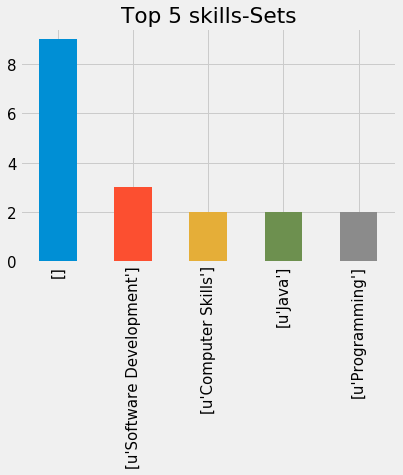

In [154]:
# Plot the graph
df.careerjunction_za_skills.value_counts().head(5).plot.bar(title="Top 5 skills-Sets")

In [133]:
# comparing skills set
#df.careerjunction_za_skills[0:10] == 'Software Developer'
df.careerjunction_za_skills.iloc[0:10][3] == df.careerjunction_za_skills.iloc[0:10][7]

False

In [238]:
df.careerjunction_za_recent_jobtitles[568] == df.careerjunction_za_recent_jobtitles[6]

False

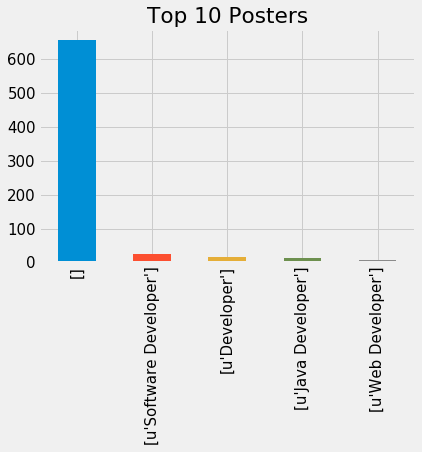

In [134]:
#10 primary jobs with most recent
#df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10]

### Content-Based Recommender in Python

#### Plot Description Based Recommender

In this section, we build a system that recommends job title that are similar to a 
particular jobs. More specifically, we compute pairwise similarity scores for all jobs
based on their plot descriptions and recommend recent job position based on that similarity score

The plot description is available as the primary job title feature in the dataset.
In its current form, it is not possible to compute the similarity between any jobs

We compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. 
This will give you a matrix where each column represents a word in the overview vocabulary (all 
the words that appear in at least one document) and each column represents a movie, as before.

In its essence, the TF-IDF score is the frequency of a word occurring in a document, 
down-weighted by the number of documents in which it occurs. This is done to reduce 
the importance of words that occur frequently in plot overviews and therefore, 
their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces 
the TF-IDF matrix in a couple of lines.

In [100]:
#Import TfIdfVectorizer from scikit-learn
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import linear_kernel

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['careerjunction_za_recent_jobtitles'] = df['careerjunction_za_recent_jobtitles'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['careerjunction_za_recent_jobtitles'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [144]:
#print list(enumerate(cosine_sim))

In [276]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['careerjunction_za_primary_jobtitle']).drop_duplicates()

### Recommendations based on primary job title counts

Using this new dataframe we can easily see the most popular jobtitle of each feature. For example the different kinds of the most primary job title data, 
the developer.

In [142]:
descriptions = df.groupby(["careerjunction_za_employer_names", "careerjunction_za_skills","careerjunction_za_primary_jobtitle"])["id"].count().reset_index(name="count")
descriptions.head(3)

,careerjunction_za_employer_names,careerjunction_za_skills,careerjunction_za_primary_jobtitle,count
0,"[u""Activ'Browser"", u'Credit Agricole', u'Infos...","[u'jQuery', u'Javascript', u'LAMP', u'Zend Fra...",Full Stack developer,1
1,"[u""Ag's Distributors"", u'Blue Security', u'Hol...","[u'.net developer', u'C# Developer', u'SQL And...",Senior Developer C#,1
2,"[u""Hassan Mansour Int'L Co"", u'Maegabyte Compu...","[u'Oracle', u'Dev. 2000', u'Visual Basic', u'M...",Analyst-Developer,1


In [143]:
descriptions = descriptions[descriptions['careerjunction_za_primary_jobtitle'].str.contains("Developer") | descriptions['careerjunction_za_primary_jobtitle'].str.contains("Software Developer")]
descriptions.sort_values(['count'], ascending=False)[:10] 

,careerjunction_za_employer_names,careerjunction_za_skills,careerjunction_za_primary_jobtitle,count
1,"[u""Ag's Distributors"", u'Blue Security', u'Hol...","[u'.net developer', u'C# Developer', u'SQL And...",Senior Developer C#,1
1468,[u'Freelancer'],"[u'ADOBE DREAMWEAVER', u'ADOBE PHOTOSHOP', u'M...",Junior Web Developer,1
1479,[u'Futuristic Contracting & Consulting Service...,"[u'Lotus Domino Development', u'Html, Javascri...",Senior Developer,1
1482,"[u'GTL Service', u'Melange TPL']","[u'Core Java', u'Jdbc', u'Servlets / Jsp', u'S...",Java Developer,1
1485,"[u'Gadda Soft Solutions', u'Perot Systems']",[u'.NET Technologies'],.NET Developer,1
1486,"[u'Gallo Africa', u'Haddons', u'Howick High Sc...","[u'Programming', u'Software Development', u'CO...",Senior Developer (contract),1
1487,"[u'Gardale Solutions', u'Winner-Net UK']","[u""[U'Python', U'Html, Xhtml', U'Java', U'Css'...",Senior Lead Developer,1
1489,"[u'Gathic Fashions CC', u'Jazeer Investments',...","[u'Switchboard', u'Customer Services', u'Perso...",Property Developer & Investors,1
1492,"[u'Gauteng Department of eGovernment', u'Gaute...","[u'Microsoft Office', u'Android Developer', u'...",C# Developer & Content Administration,1
1493,"[u'Gauteng IT', u'Rentmeester', u'South Africa...","[u'Natural Adabas', u'SQL', u'TRelation', u'Co...",Edw Developer,1


One can see that software developer follow by developer dominates all of the items but there's obviously way too much going on here. How about just the top ten most popular items. We see that the primary jobtitle have no record for space. This indicates that we do not have information about the empty space. 